In [8]:
import os
import struct
import numpy as np

def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, 
                               '%s-labels.idx1-ubyte' 
                                % kind)
    images_path = os.path.join(path, 
                               '%s-images.idx3-ubyte' 
                               % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                    dtype=np.uint8).reshape(len(labels), 784)
 
    return images, labels

In [9]:
X_train, y_train = load_mnist('/Users/surthi/Envs/mnist', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist('/Users/surthi/Envs/mnist', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 60000, columns: 784
Rows: 10000, columns: 784


# Let's plot one example of each digit

(6742, 784)


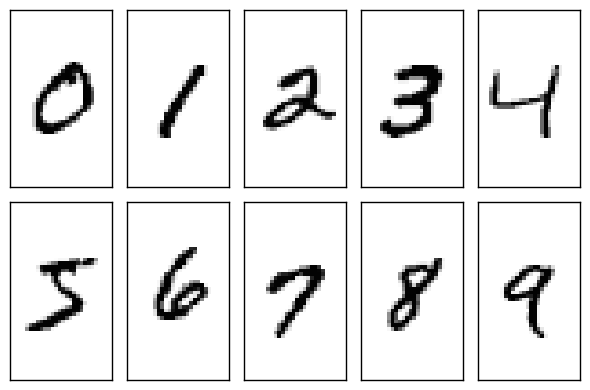

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    # pick 1 image per number. reshape it from 784 to (28x28) size
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
# Let's plot couple of examples of a number

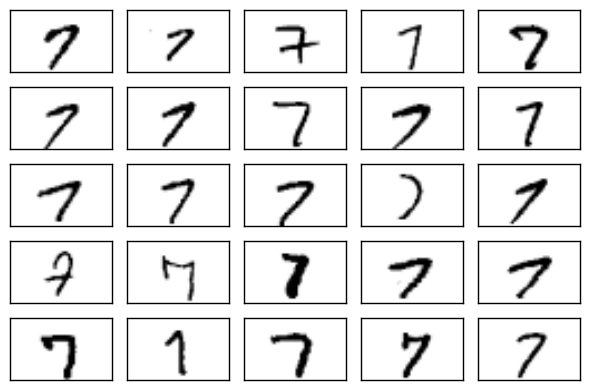

In [27]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(25):
    img = X_train[y_train == 7][i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()


# Train a multi-layer perceptron

In [34]:
%run 'neuralnet.ipynb'

nn = NeuralNetMLP(n_output=10, 
                  n_features=X_train.shape[1], 
                  n_hidden=50, 
                  l2=0.1, 
                  l1=0.0, 
                  epochs=1000, 
                  eta=0.001,
                  alpha=0.001,
                  decrease_const=0.00001,
                  shuffle=True,
                  minibatches=50, 
                  random_state=1)

nn.fit(X_train, y_train, print_progress=True)

Epoch: 1000/1000

# Plot Cost Graph

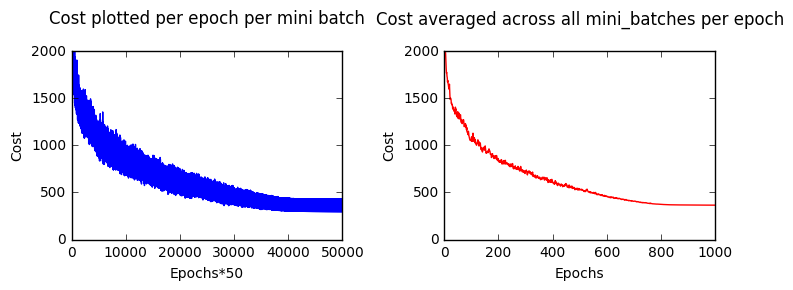

In [51]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,2, figsize=(8, 3))
ax = ax.flatten()
ax[0].plot(range(len(nn.cost_)), nn.cost_)
ax[0].set_xlabel('Epochs*50')
ax[0].set_ylabel('Cost')
ax[0].set_ylim(0, 2000)
ax[0].set_title('Cost plotted per epoch per mini batch\n')

batches = np.array_split(range(len(nn.cost_)), 1000)
cost = np.array(nn.cost_)
avg_cost = [np.mean(cost[i]) for i in batches]

ax[1].plot(range(len(avg_cost)), avg_cost, c='red')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Cost')
ax[1].set_ylim(0, 2000)
ax[1].set_title('Cost averaged across all mini_batches per epoch\n')
plt.tight_layout()
plt.show()

# Calculate Test and Train accuracy's

In [67]:
y_train_pred = nn.predict(X_train)
print 'Train Accuracy: %.2f' %(np.sum(y_train == y_train_pred)*100/X_train.shape[0])

y_test_pred = nn.predict(X_test)
print 'Test Accuracy: %.2f' %(np.sum(y_test == y_test_pred)*100/X_test.shape[0])

Train Accuracy: 97.00
Test Accuracy: 95.00


# Let's print some errors and see what did our model miss

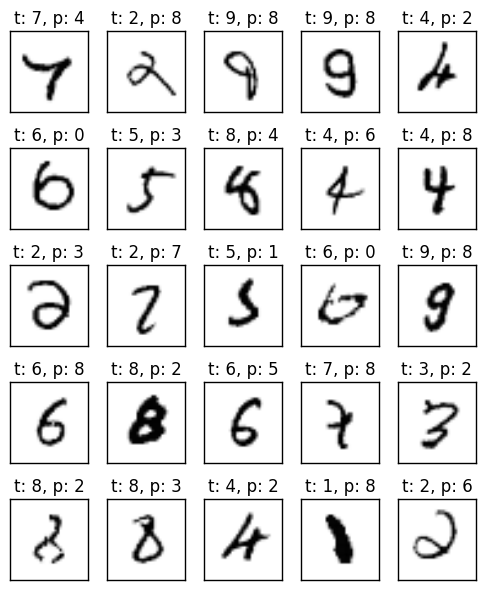

In [91]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_label = y_test[y_test != y_test_pred][:25]
miscl_label = y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(5,5, sharex=True, sharey=True, figsize=(5,6))
ax = ax.flatten()

for i in range(0,25):
    img = miscl_img[i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys')
    ax[i].set_title('t: %d, p: %d' %(correct_label[i], miscl_label[i]))

plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

# Analysis
- As we can see in the preceding figure, some of those images are even challenging for us humans to classify correctly.
- Based on the small discrepancy between training and test accuracy, we can conclude that the model only slightly overfits the training data.
- To further fine-tune the model, we could change the number of hidden units, values of the regularization parameters, learning rate, values of the decrease constant, or the adaptive learning using the techniques that we discussed in Chapter 6, Learning Best Practices for Model Evaluation and Hyperparameter Tuning (this is left as an exercise for the reader)

# What next? 
# Ans: Gradient Checking

<html>
<li>Used to check if the gradient is computed correctly
<li>Which is essentially a comparison between our analytical gradients in the network and numerical gradients. 
<li>It is generally not a bad idea to check if the gradients are computed correctly even for trivial algorithms using gradient-based optimization, such as linear regression, logistic regression, and support vector machines.
<li>We modified our MLP to do gradient checking within fit method.
<li>[Explaining gradient_checking is out of scope of this notes :) ]
</html>

# Let's now try neural net fit method with gradient_checking
<b> where allowed error 

In [98]:
%run 'neuralnet.ipynb'
nn_check = NeuralNetMLP(n_output=10, 
                                n_features=X_train.shape[1], 
                                n_hidden=10, 
                                l2=0.0, 
                                l1=0.0, 
                                epochs=10, 
                                eta=0.001,
                                alpha=0.0,
                                decrease_const=0.0,
                                minibatches=1, 
                                random_state=1)

nn_check.fit(X_train[:5], y_train[:5], print_progress=False)

Ok: 2.55718304486e-10
Ok: 2.93177396544e-10
Ok: 2.34262196531e-10
Ok: 2.38952461054e-10
Ok: 3.38054867858e-10
Ok: 3.59765460955e-10
Ok: 2.22343442025e-10
Ok: 2.33750081269e-10
Ok: 3.25653987016e-10
Ok: 2.23698144062e-10


# Why we did not use regular gradient descent but mini-batch learning to train our neural network?
<html>
<li>Mini-batch learning is a special form of stochastic gradient descent where we compute the gradient based on a subset k of the n training samples.
<li> Mini-batch learning has the advantage over online learning that we can make use of our vectorized implementations to improve computational efficiency. 
<li> However, we can update the weights much faster than in regular gradient descent. 
<li> Although this is a stochastic approach, it often leads to very accurate solutions with a much faster convergence than regular gradient descent. 
</html>
<h2>why so many other params?</h2>
<html><li>The main message is that we do not want our algorithm to get trapped in local minima. 
<li>Learning rate: By increasing the learning rate, we can more readily escape local minima. On the other hand, we also increase the chance of overshooting the global optimum if the learning rate is too large. 
<li>Since we initialize the weights randomly, we start with a solution to the optimization problem that is typically hopelessly wrong.
<li>A decrease constant, which we defined earlier, can help us to climb down the cost surface faster in the beginning and
<li>Adaptive learning rate allows us to better anneal to the global minimum.
</html>

Q&A: num_hidden units??
Although this is a stochastic approach, it often leads to very accurate solutions with a much faster convergence than regular gradient descent. ??